In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


from sklearn.model_selection import train_test_split


from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from statistics import stdev

# Importing Dataset

In [2]:
Data = pd.read_csv('Mobile-data-train.csv')

In [3]:
test = pd.read_csv('Mobile-data-test.csv')

In [7]:

Df = pd.DataFrame(Data)
Df.head(5)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [8]:

Df_test = pd.DataFrame(test)
Df_test.head(5)

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

# EDA

In [10]:
# View dimensions of dataset   
Df.shape

(2000, 21)

In [11]:
# Statistical details
Df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

- Each feature contains **2000** data recorded. 
- There are some numerical features in the dataset including **m_dep, px height, and sc_w** that their **min** values **don't make sense**.

In [8]:
# Number of uniqe elements in each columns
unique = Df.nunique()
unique.to_frame().T

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1094     2           26         2  20       2          63     10   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        121        8  ...       1137      1109  1562    15    19         19   

   three_g  touch_screen  wifi  price_range  
0        2             2     2            4  

[1 rows x 21 columns]

In [9]:
# Information about the dataframe
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc



- **clock_speed** and **m_dep** has an **float64** type and the rest of the features have an **int64** type.

  
#  Discover Data (test)</p>

In [10]:
# View dimensions of dataset   
rows, col = Df_test.shape
print ("Dimensions of dataset: {}" . format (Df_test.shape))
print ('Rows:', rows,'\nColumns:', col)

Dimensions of dataset: (1000, 21)
Rows: 1000 
Columns: 21


In [11]:
# Statistical details
Df_test.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='Greens')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

- Each feature contains **1000** data recorded. 
- There are some numerical features in the dataset including **m_dep, px height, and sc_w** that their **min** values **don't make sense**.

In [12]:
# Information about the dataframe
Df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

## Data Preprocessing

Some numeric features in the dataset, including **m_dep, px height, and sc_w**, whose minimum values did not make sense.

#### Mobile Depth (Cm):

In [14]:
Df['m_dep'].describe()

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

- According to the Internet the thickness of a mobile ranges from 0.7 cm ,how ever here i considered the **minimum Mobile Depth** to be **0.5 centimeters**.

# Pixel Resolution (Height):

In [16]:
Df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64



- Again Here i  have considered the min pixel resolution of a mobile phone should start from **65 pixels** , which i found it out from internet.(Gsm Arena) - because **0.00 pixels** doesn't makes any sense.

#### 🎄Screen Width (Cm):

In [19]:
Df.sc_w.describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64



- Same goes for screen width **0.000** doesnt makes any sense  thus i have considered it to be **2.54 centimeters**.


# Data Cleaning


# Mobile Depth

#### Train Data

In [17]:
below_threshold = Df["m_dep"][Df["m_dep"] < 0.5] # Find values below 0.5 cm
num_below_threshold = len(below_threshold)# Count the number of values below 0.5 cm

print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold)

Number of values below 0.5 cm in 'm_dep' feature:  900


In [18]:
Df["m_dep"][Df["m_dep"] < 0.5] = 0.5 # Replacing values 

C:\Users\soumo\AppData\Local\Temp\ipykernel_14196\2869195107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df["m_dep"][Df["m_dep"] < 0.5] = 0.5# Replacing values


In [19]:
Df.m_dep.describe()

count    2000.000000
mean        0.626000
std         0.165159
min         0.500000
25%         0.500000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

# Test Data

In [20]:
# Find values below 0.5 cm
below_threshold3 = Df_test["m_dep"][Df_test["m_dep"] < 0.5]

# Count the number of values below 0.5 cm
num_below_threshold3 = len(below_threshold3)

# Print the number of values below 0.5 cm
print("Number of values below 0.5 cm in 'm_dep' feature: ", num_below_threshold3)

Number of values below 0.5 cm in 'm_dep' feature:  418


In [21]:
# Replace values below 0.5 cm with 0.5 cm
Df_test["m_dep"][Df_test["m_dep"] < 0.5] = 0.5

C:\Users\soumo\AppData\Local\Temp\ipykernel_14196\1155113463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_test["m_dep"][Df_test["m_dep"] < 0.5] = 0.5


In [22]:
Df_test.m_dep.describe()

count    1000.00000
mean        0.62880
std         0.16516
min         0.50000
25%         0.50000
50%         0.50000
75%         0.80000
max         1.00000
Name: m_dep, dtype: float64


# Pixel Resolution

# Train Data

In [23]:
# Find values below 65 pixels
below_threshold1 = Df["px_height"][Df["px_height"] < 65]

# Count the number of values below 65 pixels
num_below_threshold1 = len(below_threshold1)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels in 'px_height' feature: ", num_below_threshold1)

Number of values below 65 pixels in 'px_height' feature:  90


In [24]:
# Replace values below 65 pixels with 65 pixels
Df["px_height"][Df["px_height"] < 65] = 65

C:\Users\soumo\AppData\Local\Temp\ipykernel_14196\2065217765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df["px_height"][Df["px_height"] < 65] = 65


In [25]:
Df.px_height.describe()

count    2000.000000
mean      646.529000
std       441.845917
min        65.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

#### Test Data

In [29]:
# Find values below 65 pixels
below_threshold4 = Df_test["px_height"][Df_test["px_height"] < 65]

# Count the number of values below 65 pixels
num_below_threshold4 = len(below_threshold4)

# Print the number of values below 65 pixels
print("Number of values below 65 pixels in 'px_height' feature: ", num_below_threshold4)

Number of values below 65 pixels in 'px_height' feature:  62


In [30]:
# Replace values below 65 pixels with 65 pixels
Df_test["px_height"][Df_test["px_height"] < 65] = 65

In [26]:
Df_test.px_height.describe()

count    1000.000000
mean      627.121000
std       432.929699
min         0.000000
25%       263.750000
50%       564.500000
75%       903.000000
max      1907.000000
Name: px_height, dtype: float64


# Screen Width

#### Train Data

In [27]:
# Find values below 2.54 cm
below_threshold2 = Df["sc_w"][Df["sc_w"] < 2.54]

# Count the number of values below 2.54 cm
num_below_threshold2 = len(below_threshold2)

# Print the number of values below 2.54 cm
print("Number of values below 2.54 cm in 'sc_w' feature: ", num_below_threshold2)

Number of values below 2.54 cm in 'sc_w' feature:  546


In [28]:
# Replace values below 2.54 cm with 2.54 cm
Df["sc_w"][Df["sc_w"] < 2.54] = 2.54

C:\Users\soumo\AppData\Local\Temp\ipykernel_14196\4282539709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df["sc_w"][Df["sc_w"] < 2.54] = 2.54


In [29]:
Df.sc_w.describe()

count    2000.000000
mean        6.199420
std         3.891793
min         2.540000
25%         2.540000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

#### Test Data

In [30]:
# Find values below 2.54 cm
below_threshold5 = Df_test["sc_w"][Df_test["sc_w"] < 2.54]

# Count the number of values below 2.54 cm
num_below_threshold5 = len(below_threshold5)

# Print the number of values below 2.54 cm
print("Number of values below 2.54 cm in 'sc_w' feature: ", num_below_threshold5)

Number of values below 2.54 cm in 'sc_w' feature:  318


In [31]:
# Replace values below 2.54 cm with 2.54 cm
Df_test["sc_w"][Df_test["sc_w"] < 2.54] = 2.54

C:\Users\soumo\AppData\Local\Temp\ipykernel_14196\3849787234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_test["sc_w"][Df_test["sc_w"] < 2.54] = 2.54


In [32]:
Df_test.sc_w.describe()

count    1000.000000
mean        5.810720
std         3.740874
min         2.540000
25%         2.540000
50%         5.000000
75%         8.000000
max        18.000000
Name: sc_w, dtype: float64

 
#### Missing Values

### Check for Missing Values

In [34]:
Df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- There aren't any **missing values** in the **train** dataset.

In [35]:
# Missing values (test)
Df_test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

- There aren't any **missing values** in the **test** dataset.

# Checking for Duplicated Data.

In [40]:
# Duplicated data (train)
Df.duplicated().sum()

0

In [41]:
# Duplicated data (test)
Df_test.duplicated().sum()

0

### Drop Redundant Columns

In [36]:
# Drop Id column in test data
Df_test.drop(['id'], axis=1, inplace=True)
Df_test.shape

(1000, 20)

 
# Outliers

In [38]:
Df.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         65       756  2549     9  7.00         19   
1        136        3  ...        905      1988  2631    17  3.00          7   
2        145        5  ...       1263      1716  2603    11  2.54          9   
3        131        6  ...       1216      1786  2769    16  8.00         11   
4        141        2  ...       1208      1212  1411     8  2.54         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

### Check for Outliers

In [60]:
# Separate numerical and categorical features
num_cols = pd.DataFrame (Df, columns= ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'])
cat_cols = pd.DataFrame (Df, columns= ['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi'])

In [40]:
# Separate numerical and categorical features into different lists
numerical_columns = list(Df.loc[:,['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']])
categorical_columns = list(Df.loc[:,['blue', 'dual_sim', 'four_g', 'n_cores', 'three_g', 'touch_screen', 'wifi']])

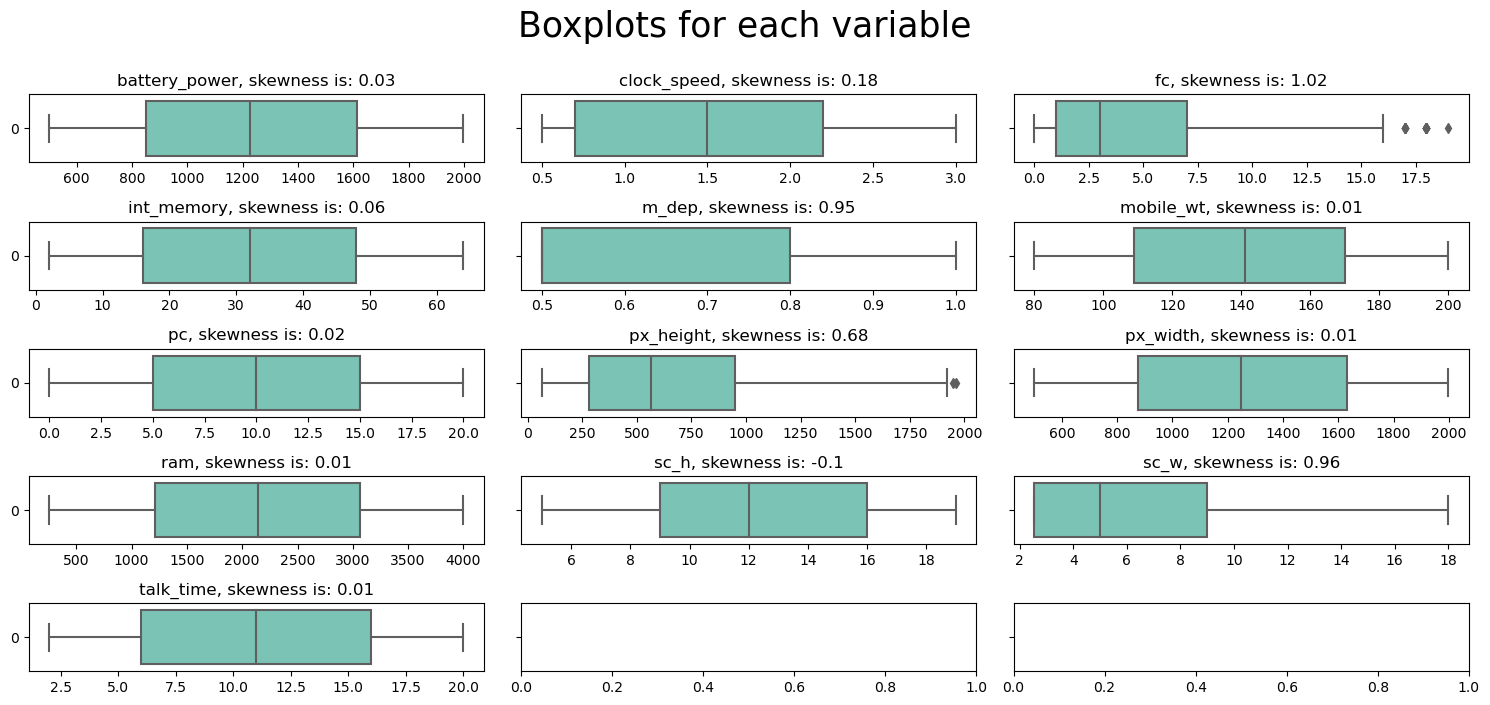

In [42]:
# Visualizing the Numerical Features by boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(15,7))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', color ='#6fcfbc', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True), 2)))
        
boxplots_custom(dataset=Df, columns_list=numerical_columns, rows=5, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

## Detect Outliers

- While the boxplots in the table above indicate the presence of outliers in the **fc** and **px_height** features, we cannot justify removing them from the dataset without a strong rationale to do so. Therefore, we have decided to retain these outliers in our analysis.

### Pair Plot

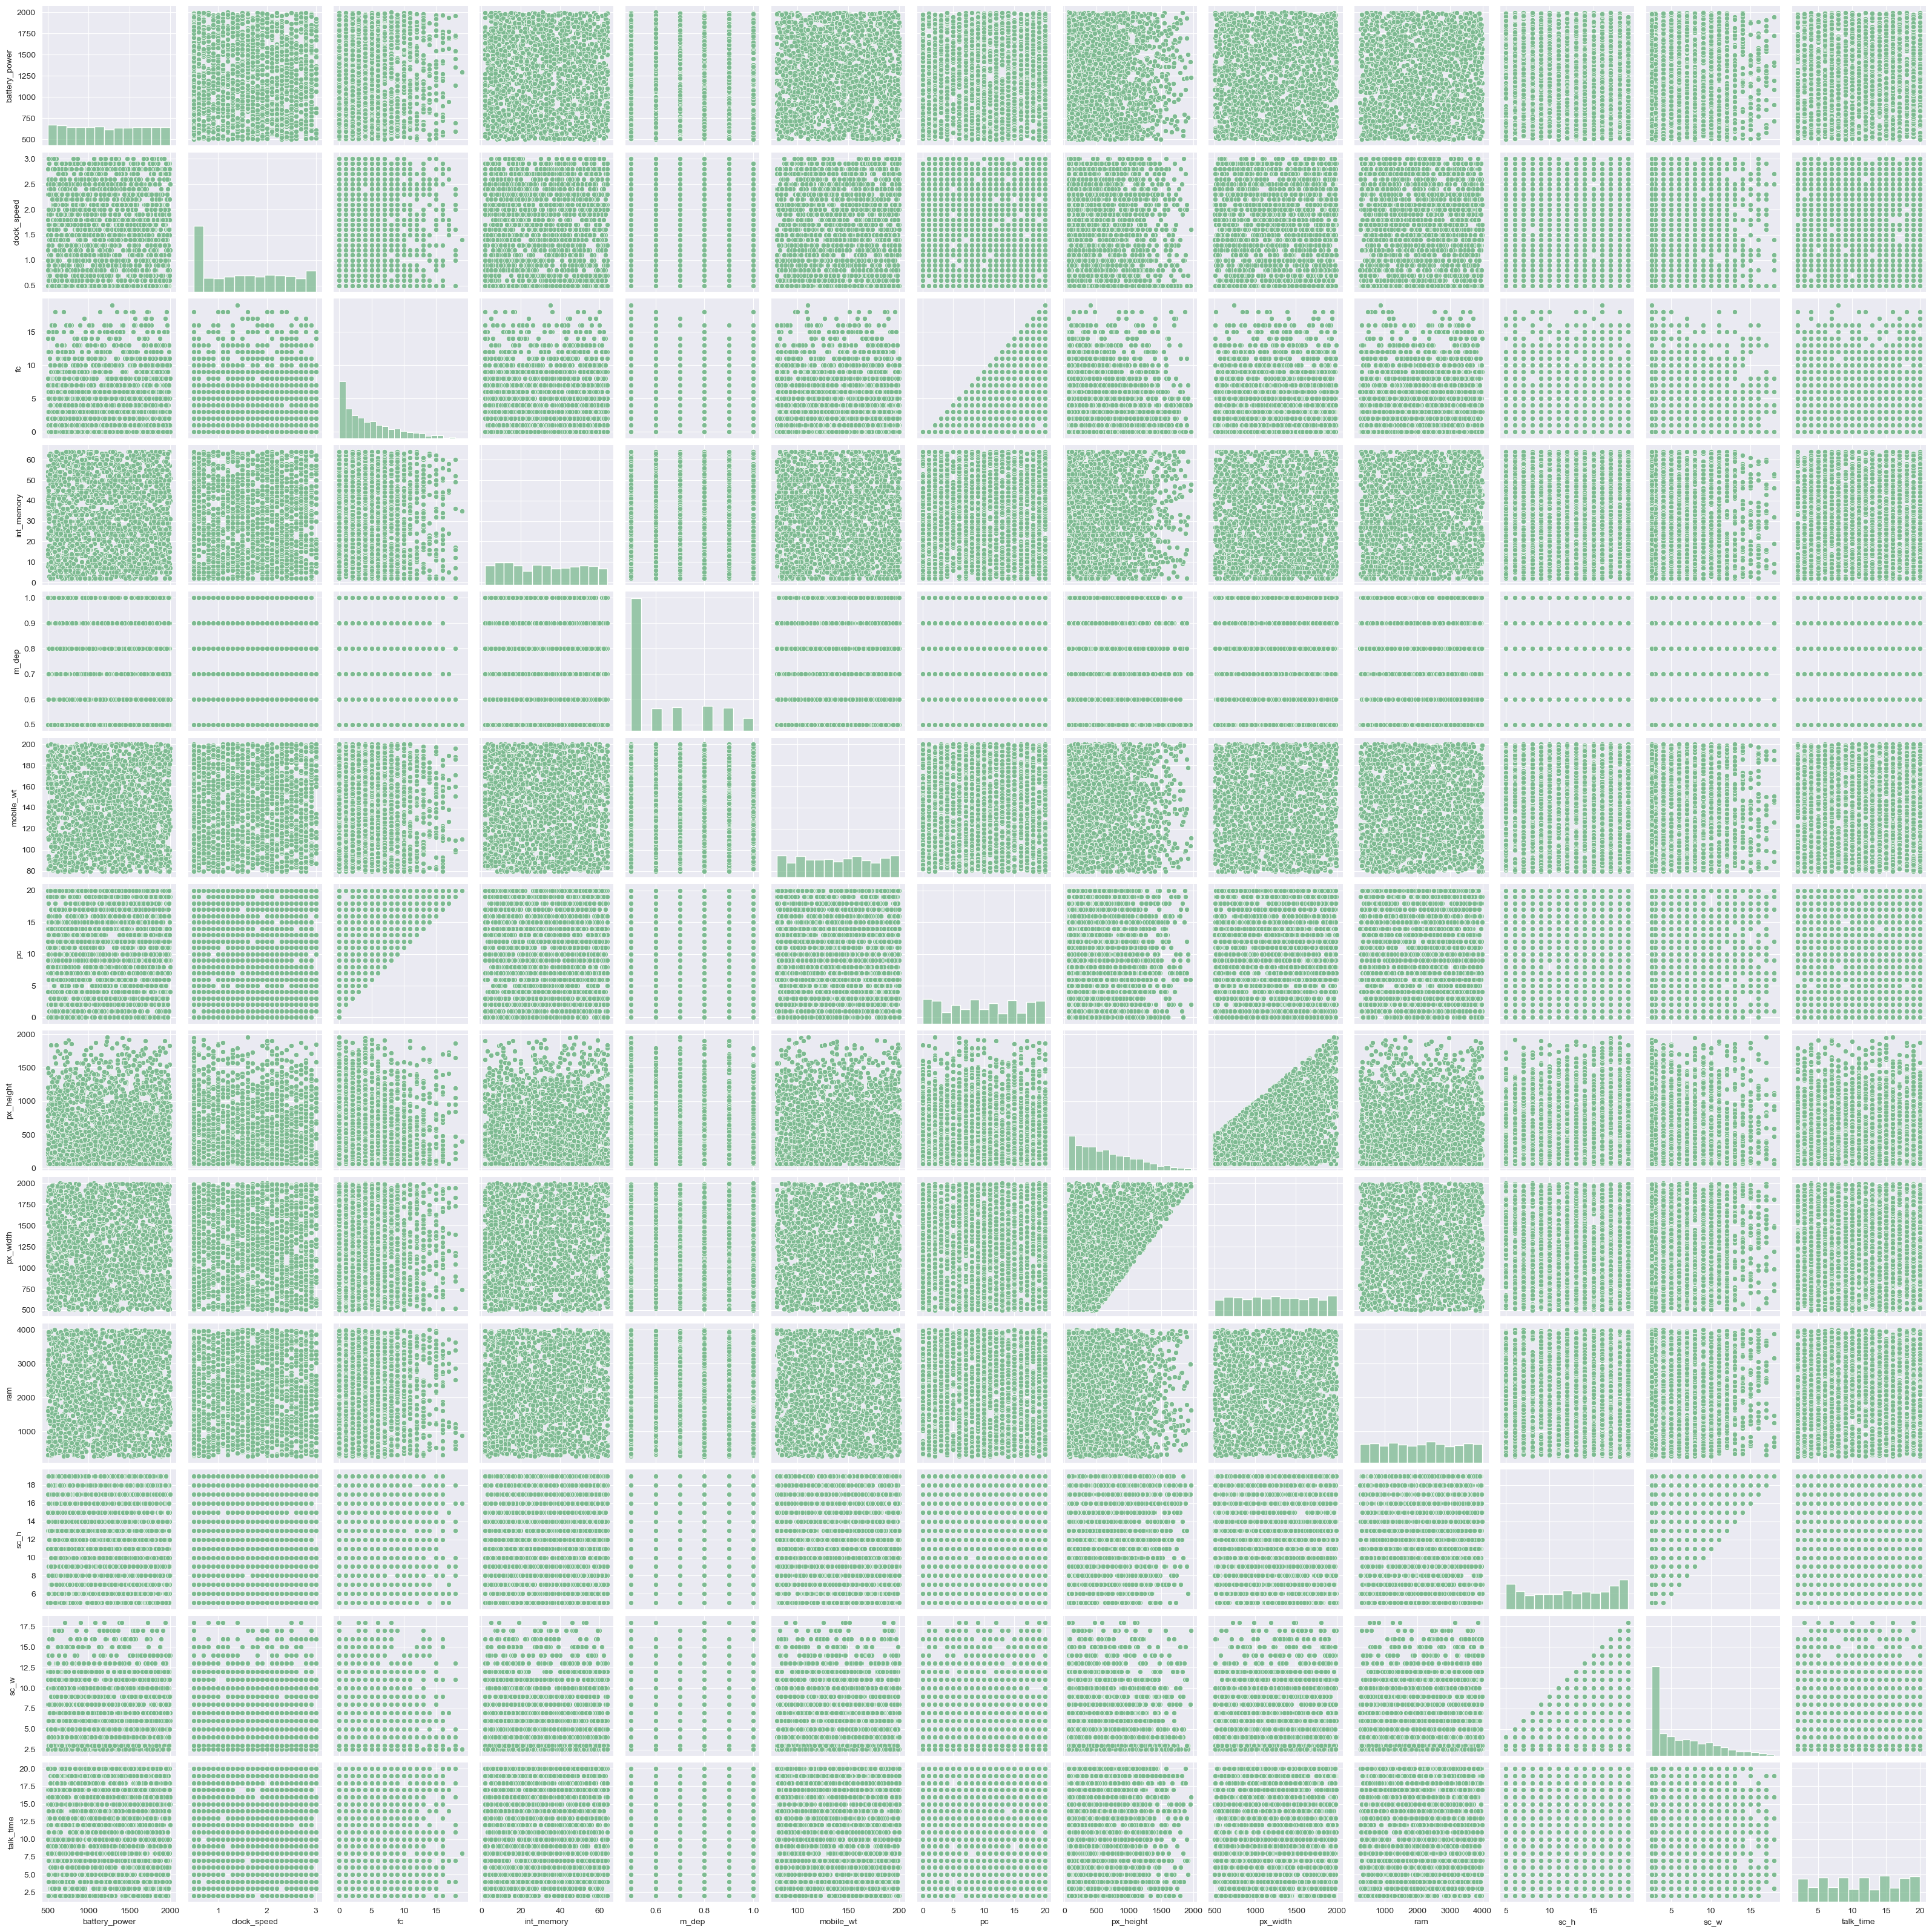

In [46]:
# Check noises by pairplot
sns.set_palette('crest')
sns.set_style('darkgrid')
dnp = sns.pairplot(Df.loc[:, numerical_columns])
# Show the plot
plt.show()

- It seems that there isn't any **Noisy** data in the train dataset.

<a id="1"></a>  
####  Data Imbalance</p>

In [57]:
Df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [58]:
Df['price_range'].value_counts(normalize=True)

1    0.25
2    0.25
3    0.25
0    0.25
Name: price_range, dtype: float64

- The above charts show that all classes of the target variable have the **same count**. So, the target data is **completely balanced**.

# Univariate Analysis

<h4 align="left"><font color='#254441'>5.3.1. Exploring Categorical Features</font>

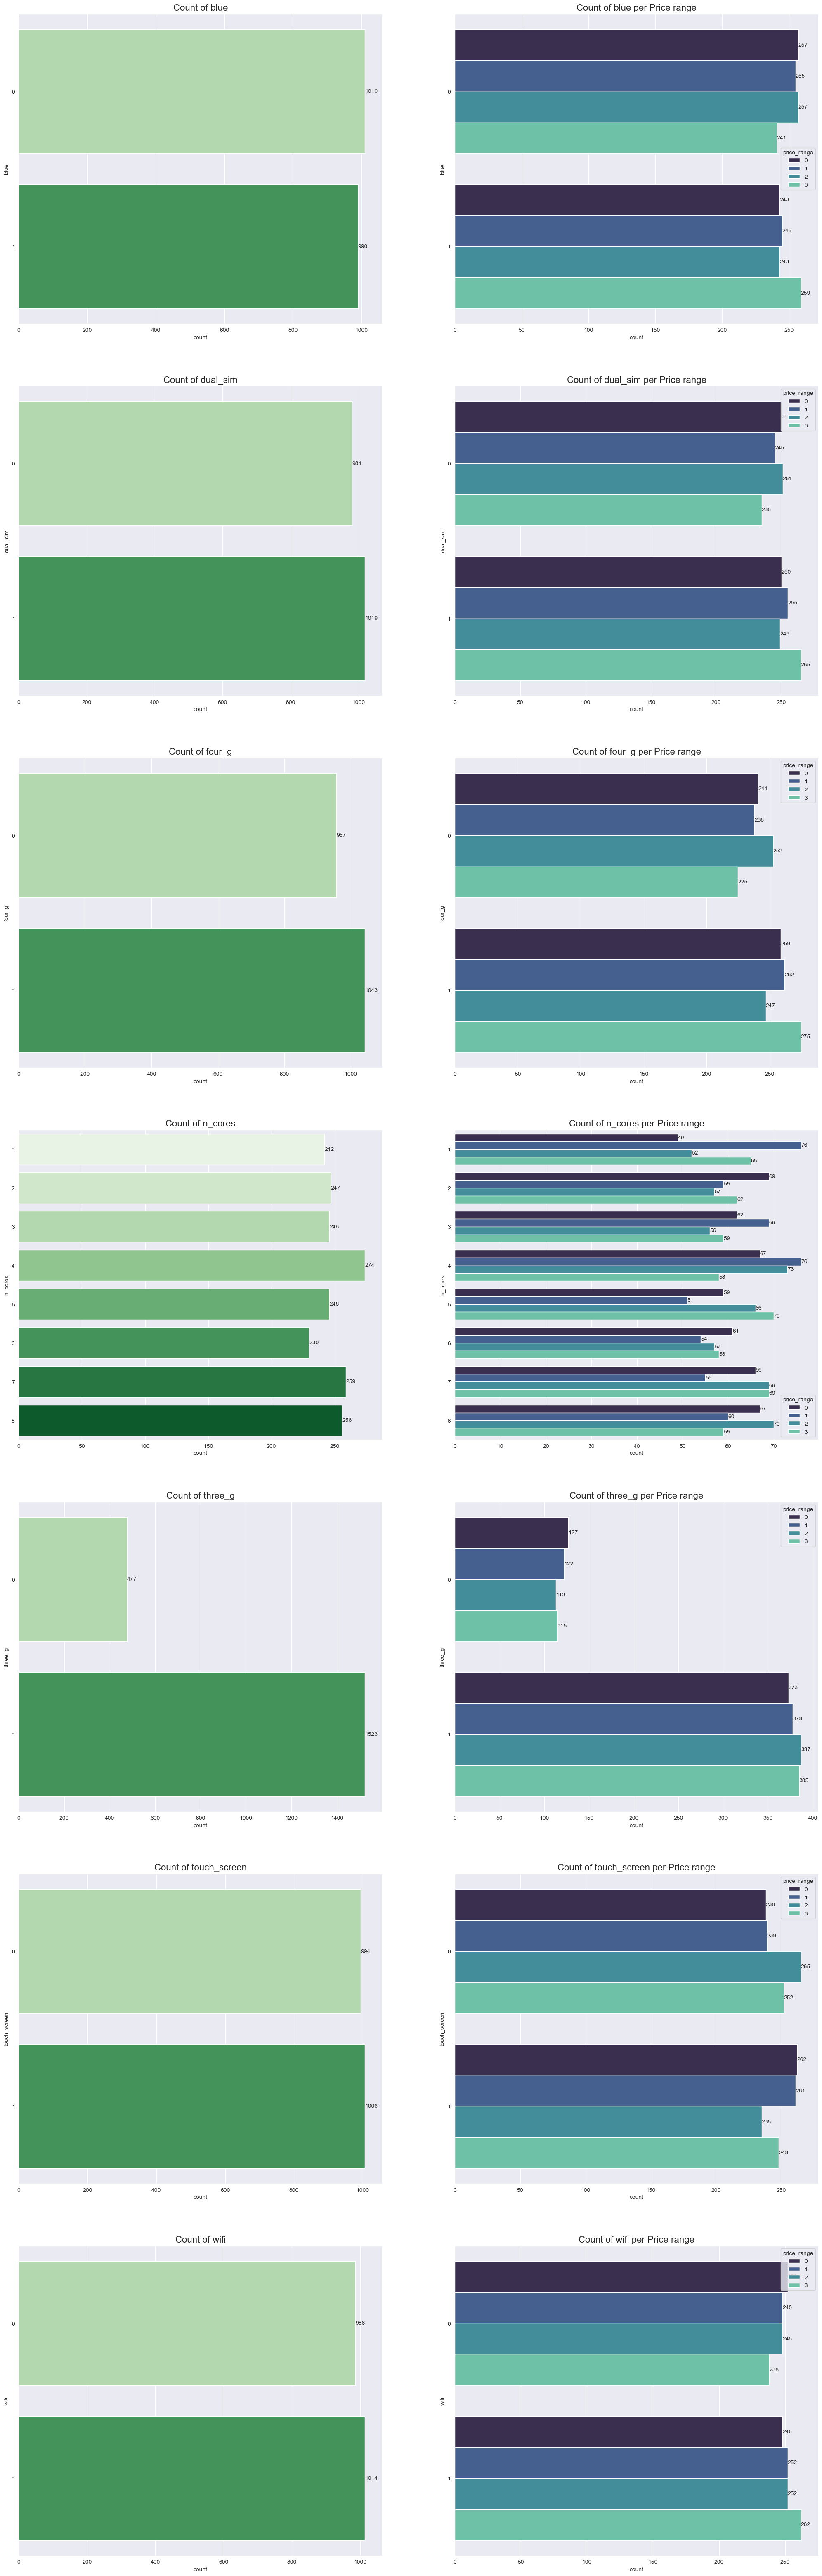

In [51]:
fig, axes = plt.subplots(7,2, figsize=(25,80))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=Df, y=col, palette='Greens', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='16')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=Df, y=col, palette='mako', orient='h',  hue='price_range',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Price range', fontsize='16')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

- **Bluetooth:**    
  - The count of the **blue** chart shows that mobile phones **without Bluetooth** have the highest frequency than the ones with Bluetooth.
  - Moreover, the count of **blue** per price range shows that in the group of mobile phones **without Bluetooth**, the **Low-cost** and **High-cost** phones have the highest frequency, and on the other hand, in the group of mobile phones **with Bluetooth**, the **Very high-cost** phones have the highest frequency.
    
- **Dual Sim:**     
  - The count of the **dual_sim** chart shows that mobile phones which **have Dual Sim** have the highest frequency.
  - Moreover, the count of **dual_sim** per price range shows that in the group of mobile phones **without Dual Sim**, the **High-cost** and **Low-cost** phones have the highest frequency, and in the group of mobile phones **with Dual Sim**, the **Very high-cost** phones have the highest frequency.
    
- **4G:**     
  - The count of the **four_g** chart shows that mobile phones which **have 4G** have the highest frequency than the ones without 4G.
  - Moreover, the count of **four_g** per price range shows that in the group of mobile phones **with 4G**, the **Medium-cost** phones have the highest frequency.    
    
- **Number of Cores:**     
  - The count of the **n-cores** chart shows that mobile phones **containing 4 cores** have the highest frequency.
  - Moreover, the count of **n-cores** per price range shows that in the group of mobile phones **with 4 cores**, the **High-cost** phones have the highest frequency, and in the group of mobile phones **containing 4 cores**, the **Medium-cost** phones have the highest frequency.  
    
- **3G:**     
  - The count of the **three_g** chart shows that mobile phones **with 3G** have the highest frequency than the ones without 3G.
  - Moreover, the count of **three_g** per price range shows that in the group of mobile phones **with 3G**, the **High-cost** phones have the highest frequency, and in the group of mobile phones **without 3G**, the **Low-cost** phones have the highest frequency.
    
- **Touch Screen:**     
  - The count of the **touch_screen** chart shows that mobile phones which **have Touch Screen** have the highest frequency than the ones without Touch Screen.
  - Moreover, the count of **touch_screen** per price range shows that in the group of mobile phones **with Touch Screen**, the **Low-cost** phones have the highest frequency, and in the group of mobile phones **without Touch Screen**, the **High-cost** phones have the highest frequency.
    
- **Wifi:**     
  - The count of the **wifi** chart shows that mobile phones which **have Wifi** have the highest frequency than the ones without Wifi.
  - Moreover, the count of **wifi** per price range shows that in the group of mobile phones **with Wifi**, the **Very high-cost** phones have the highest frequency, and in the group of mobile phones **without Wifi**, the **Low-cost** phones have the highest frequency.

<h4 align="left"><font color='#254441'>5.3.2. Exploring Numerical Features</font>

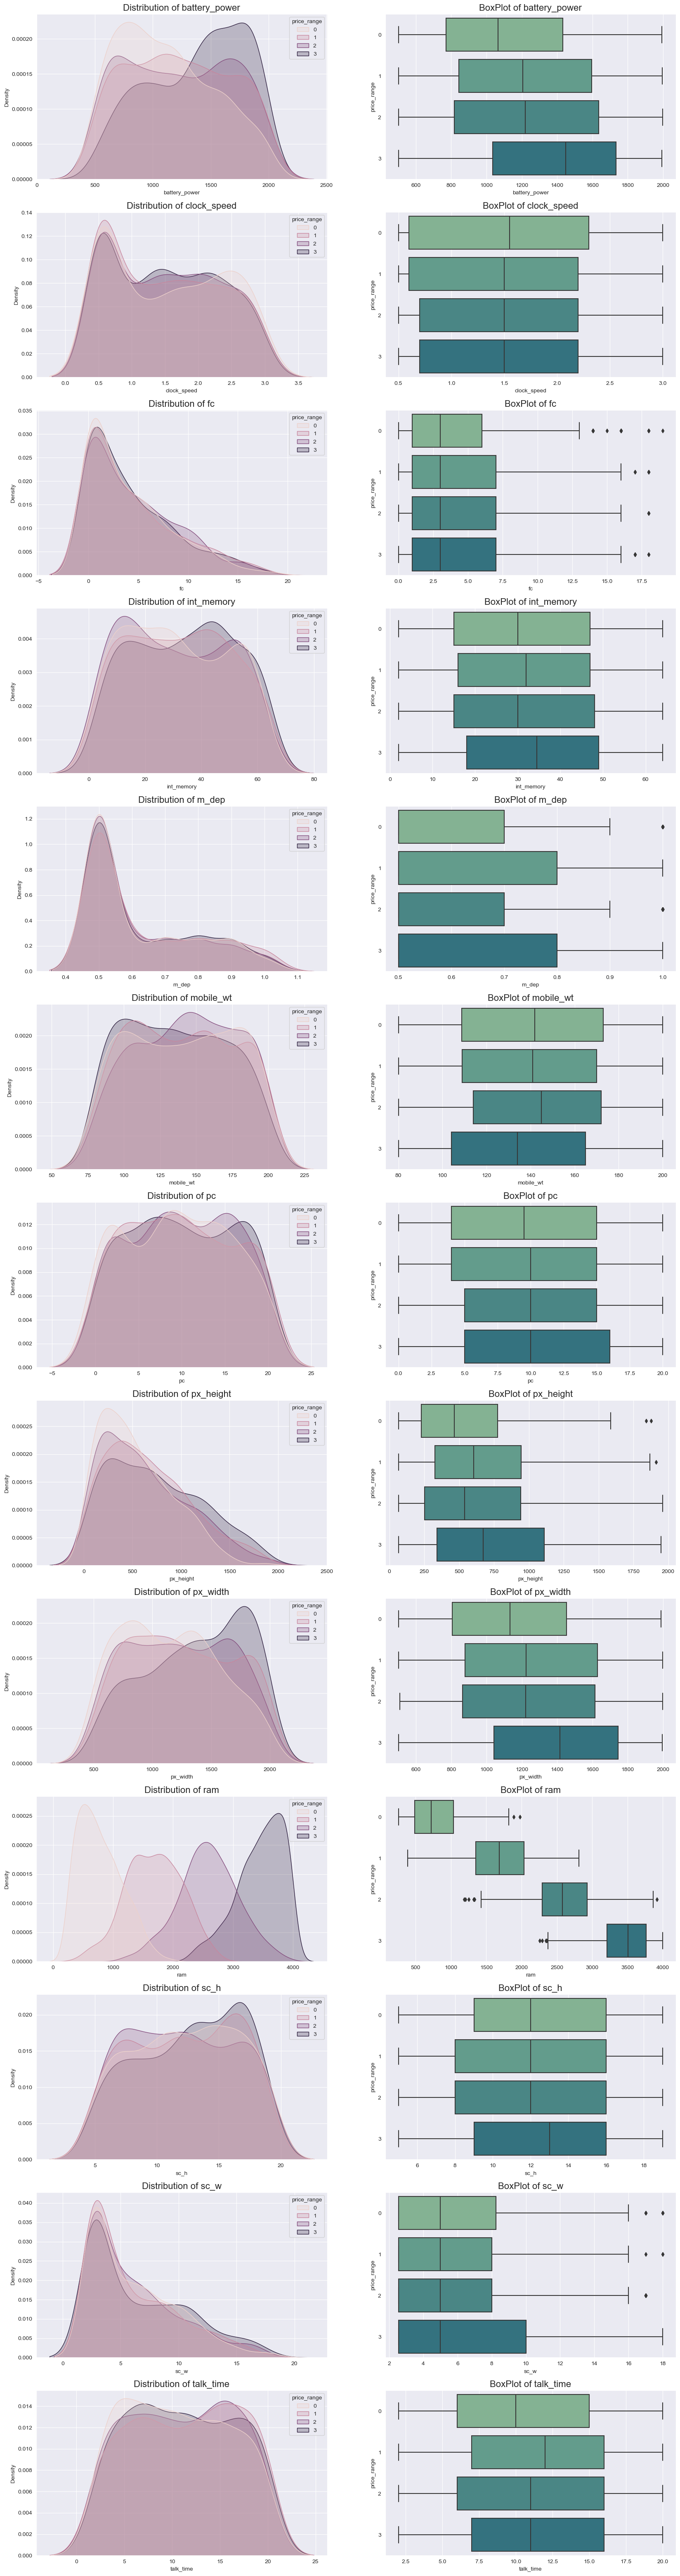

In [70]:
fig, axes = plt.subplots(13,2, figsize=(20,80))
sns.set_style('darkgrid')
idx = 0
for col in (numerical_columns):
    sns.kdeplot(data=Df, x=col,fill=True , hue='price_range', 
                ax=axes[idx][0]).set_title(f'Distribution of {col}', fontsize='16')
    sns.boxplot(data=Df, x=col, y='price_range', orient='h', 
                ax=axes[idx][1]).set_title(f'BoxPlot of {col}', fontsize='16')
    idx +=1
plt.show()

- A **normal distribution (with no skewness)** is observed in the features of **int_memory**, **mobile_wt**, **pc** and **talk time** for all price ranges.
    
- **Battery Power**:    
  - Mobile phones with price ranges of 0-3 mostly have **battery_power** at the range of **600-800, 700-1350, 600-900**, and **1500-1900 mAh**, respectively.
    
- **Clock Speed**: 
  - Mobile phones with all price ranges mostly have **clock_speed** at the range of **0.4-0.8**.
  - A **positive skewness** is observed in the distribution of **clock_speed** for all price ranges.
  - The box plot of **clock_speed** indicates that all price ranges have the same **median** equal **1.5**.
    
- **Front Camera**:
  - Mobile phones with all price ranges mostly have **fc** in the range of **0-2.5 megapixels**.
  - A **positive skewness** is observed in the distribution of **fc** for all price ranges.
  - The box plot of **fc** indicates that all price ranges have the same **median** equal **3 megapixels**.
    
- **Internal Memory**:    
  - Mobile phones with price ranges of 0-3 mostly have **int_memory** at the range of **10-30, 35-50, 13-20**, and **40-50 gigabytes**, respectively.
 
- **Mobile Depth**: 
  - A **positive skewness** is observed in the distribution of **m_dep** for all price ranges.
  - Mobile phones with all price ranges mostly have **m_dep** at the range of **0.5-0.55 cm**.
    
- **Pixel Resolution Height**:     
  - A **positive skewness** is observed in the distribution of **px_height** for all price ranges.
  - Mobile phones with all price ranges mostly have **px_height** in the range of **65-500 pixels**.
    
- **Pixel Resolution Width**:
  - Mobile phones with price ranges of 0-3 mostly have **px_width** in the range of **750-900, 700-1350, 750-1200**, and **1500-1700 pixels**, respectively.
    
- **Ram**:
  - Mobile phones with price ranges of 0-3 mostly have **ram** at the range of **450-750, 1350-1900, 2500-2800**, and **3500-3950 megabytes**, respectively.
    
- **Screen Width**:
  - A **positive skewness** is observed in the distribution of **sc_w** for all price ranges.
  - Mobile phones with all price ranges mostly have **sc_w** in the range of **2.5-4 cm**.
  - The box plot of **sc_w** indicates that all price ranges have the same **median** equal **1.5 cm**.

In [78]:
pr = Df.groupby(['price_range'])
target = pr.describe()
target
target.T.style.background_gradient()

- The highest **mean** value of **battery_power**, **int_memory**, **pc**, **px_height**, **px_width**, **ram**, **sc_h** and **sc_w** belong to the **Very high-cost** mobile phones.

# Bivariate Analysis

 # Correlation

- Our **target** is **Price Range**. So, we should check how each attribute correlates with the Price Range variable. We can do it as follows:

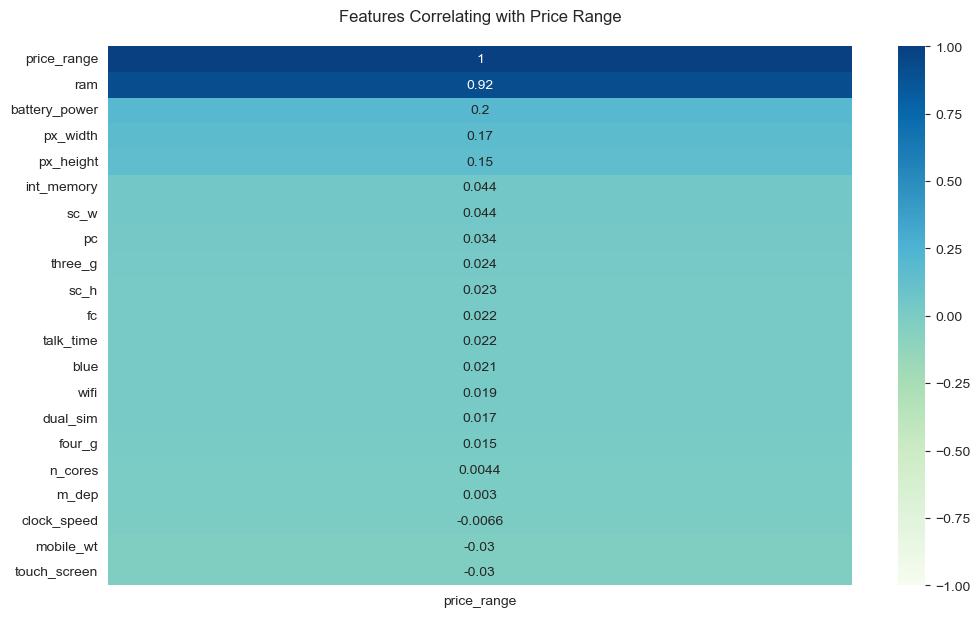

In [79]:
plt.figure (figsize = (12, 7))
heatmap = sns.heatmap (Df.corr()[['price_range']].sort_values (by = 'price_range', ascending = False), vmin = -1, vmax = 1, annot = True, cmap = 'GnBu')
heatmap.set_title ('Features Correlating with Price Range', fontdict = {'fontsize':12}, pad = 18);

- We can see that most of the variables except **clock_speed, mobile_wt** and **touch_screen** are positively correlated with the **target**.

### Correlation Between The Features

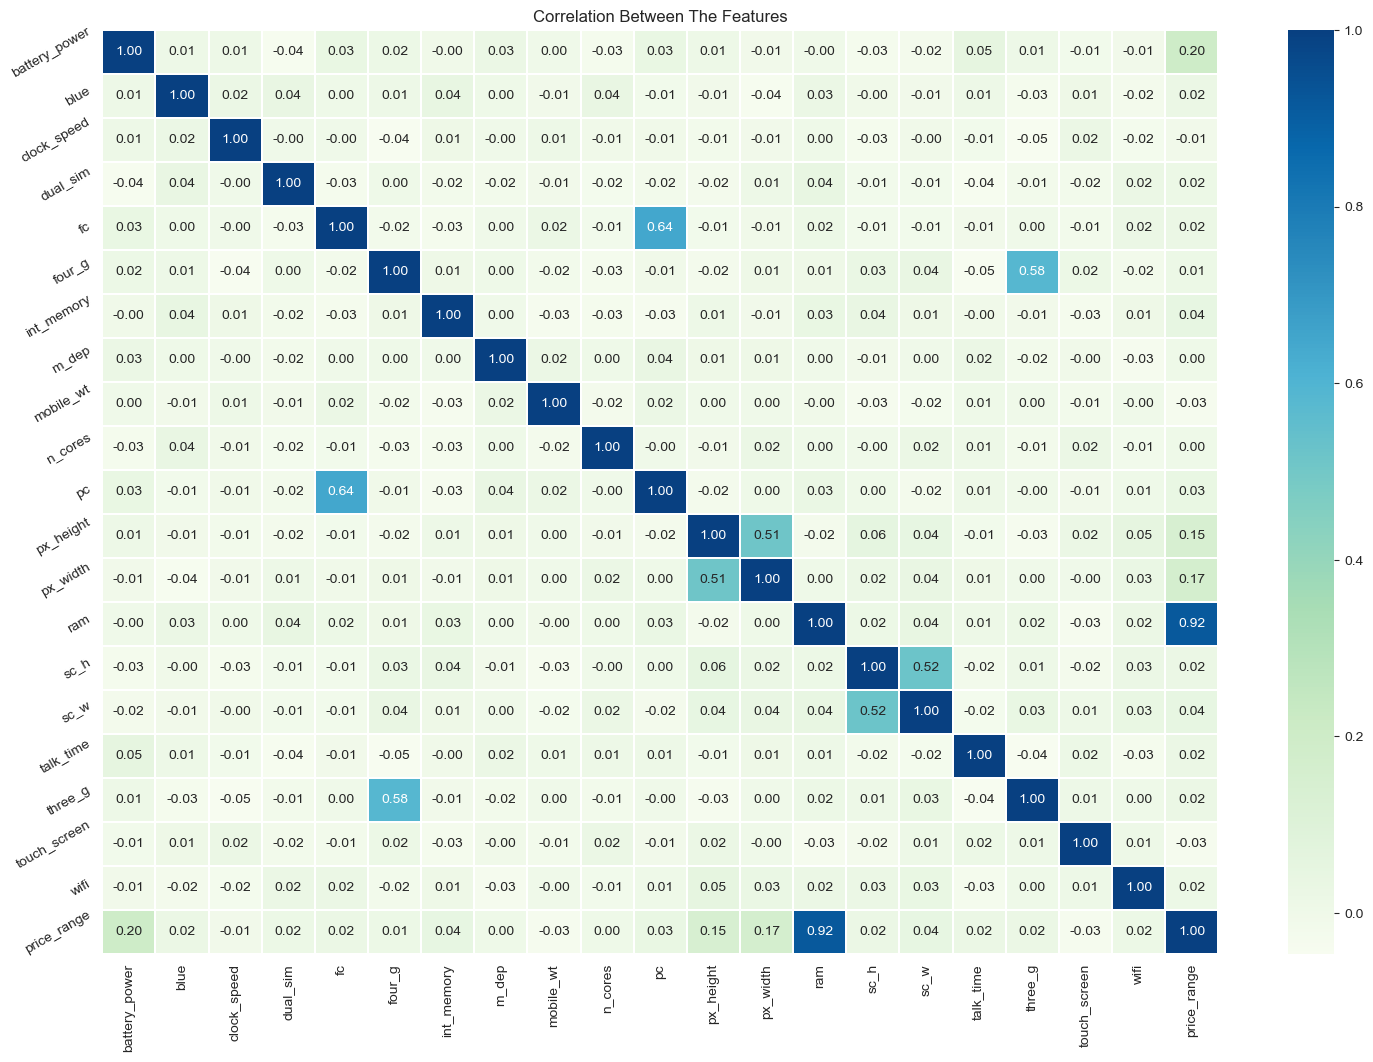

In [91]:
fig=plt.gcf()
fig.set_size_inches(18, 12)
plt.title('Correlation Between The Features')
a = sns.heatmap(Df.corr(), annot = True, cmap = 'GnBu', fmt='.2f', linewidths=0.2)
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

- There is a **strong** correlation between **ram** and **price_range**.
- In addition, the heatmap above indicates a **moderate** correlation between **4G** and **3G**, **fc** and **pc**, **px_height** and **px_width**, and **sc_h** and **sc_w**. 

# Model Building

#### Decision Tree (DTs)

#### Declare Feature Vector and Target Variable

In [91]:
df = Df
X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)

In [92]:
# Check the shape of X and y
print ('X:', X.shape,'\ny:', y.shape)

X: (2000, 20) 
y: (2000, 1)


#### Find the Best Test Size

In [93]:
# Array of test size value from 0.2 to 0.3
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    DT_Clf = DecisionTreeClassifier (max_depth=3)
    DT_Clf.fit (X_train1, y_train1)
    score.append (DT_Clf.score (X_test1, y_test1))

# Create a dataframe to display the results 
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='#acd9a8')

- We consider the test size **0.25** for **Decision Tree** modeling. 

###### Train Test Split

In [94]:
# Split X and y into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, stratify=y, test_size = 0.25, random_state = 0)

In [95]:
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train1.shape)
print('X_test shape: ', X_test1.shape)
print('y_train shape: ', y_train1.shape)
print('y_test shape: ', y_test1.shape)

X_train shape:  (1500, 20)
X_test shape:  (500, 20)
y_train shape:  (1500, 1)
y_test shape:  (500, 1)


#### Train Decision Tree Model

In [96]:
# Instantiate the model
DT_model = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training set
DT_model.fit(X_train1, y_train1)

DecisionTreeClassifier(max_depth=3)

#### Predict X-test

In [97]:
y_pred = DT_model.predict(X_test1)

#### Check Accuracy Score

In [98]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.7520


#### Check for overfitting and underfitting

In [99]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT_model.score(X_train1, y_train1)))
print('Test set score: {:.4f}'.format(DT_model.score(X_test1, y_test1)))

Training set score: 0.7693
Test set score: 0.7520


**Explanations:**
    
- The **training-set** accuracy score is **0.7693** while the **test-set** accuracy to be **0.7520**. These two values are quite comparable. So, there is no question of overfitting.

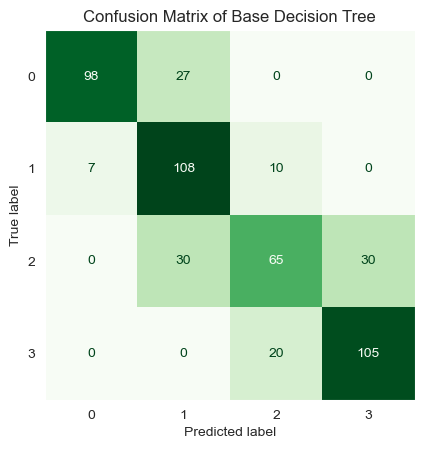

In [103]:
ConfusionMatrixDisplay.from_estimator(DT_model, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Base Decision Tree')
plt.grid(False)

#### 🎄Classification Report

In [104]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       125
           1       0.65      0.86      0.74       125
           2       0.68      0.52      0.59       125
           3       0.78      0.84      0.81       125

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500



#### 🎄Performance Metrics

In [105]:
def metrics_calculator(y_test, y_pred, model_name):
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='macro'),
                                recall_score(y_test, y_pred, average='macro'),
                                f1_score(y_test, y_pred, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result

In [106]:
BaseDT_result = metrics_calculator(y_test1, y_pred, 'Base Decision Tree')
BaseDT_result

Base Decision Tree
Accuracy             0.752000
Precision            0.762467
Recall               0.752000
F1-score             0.748901

#### Plot Tree

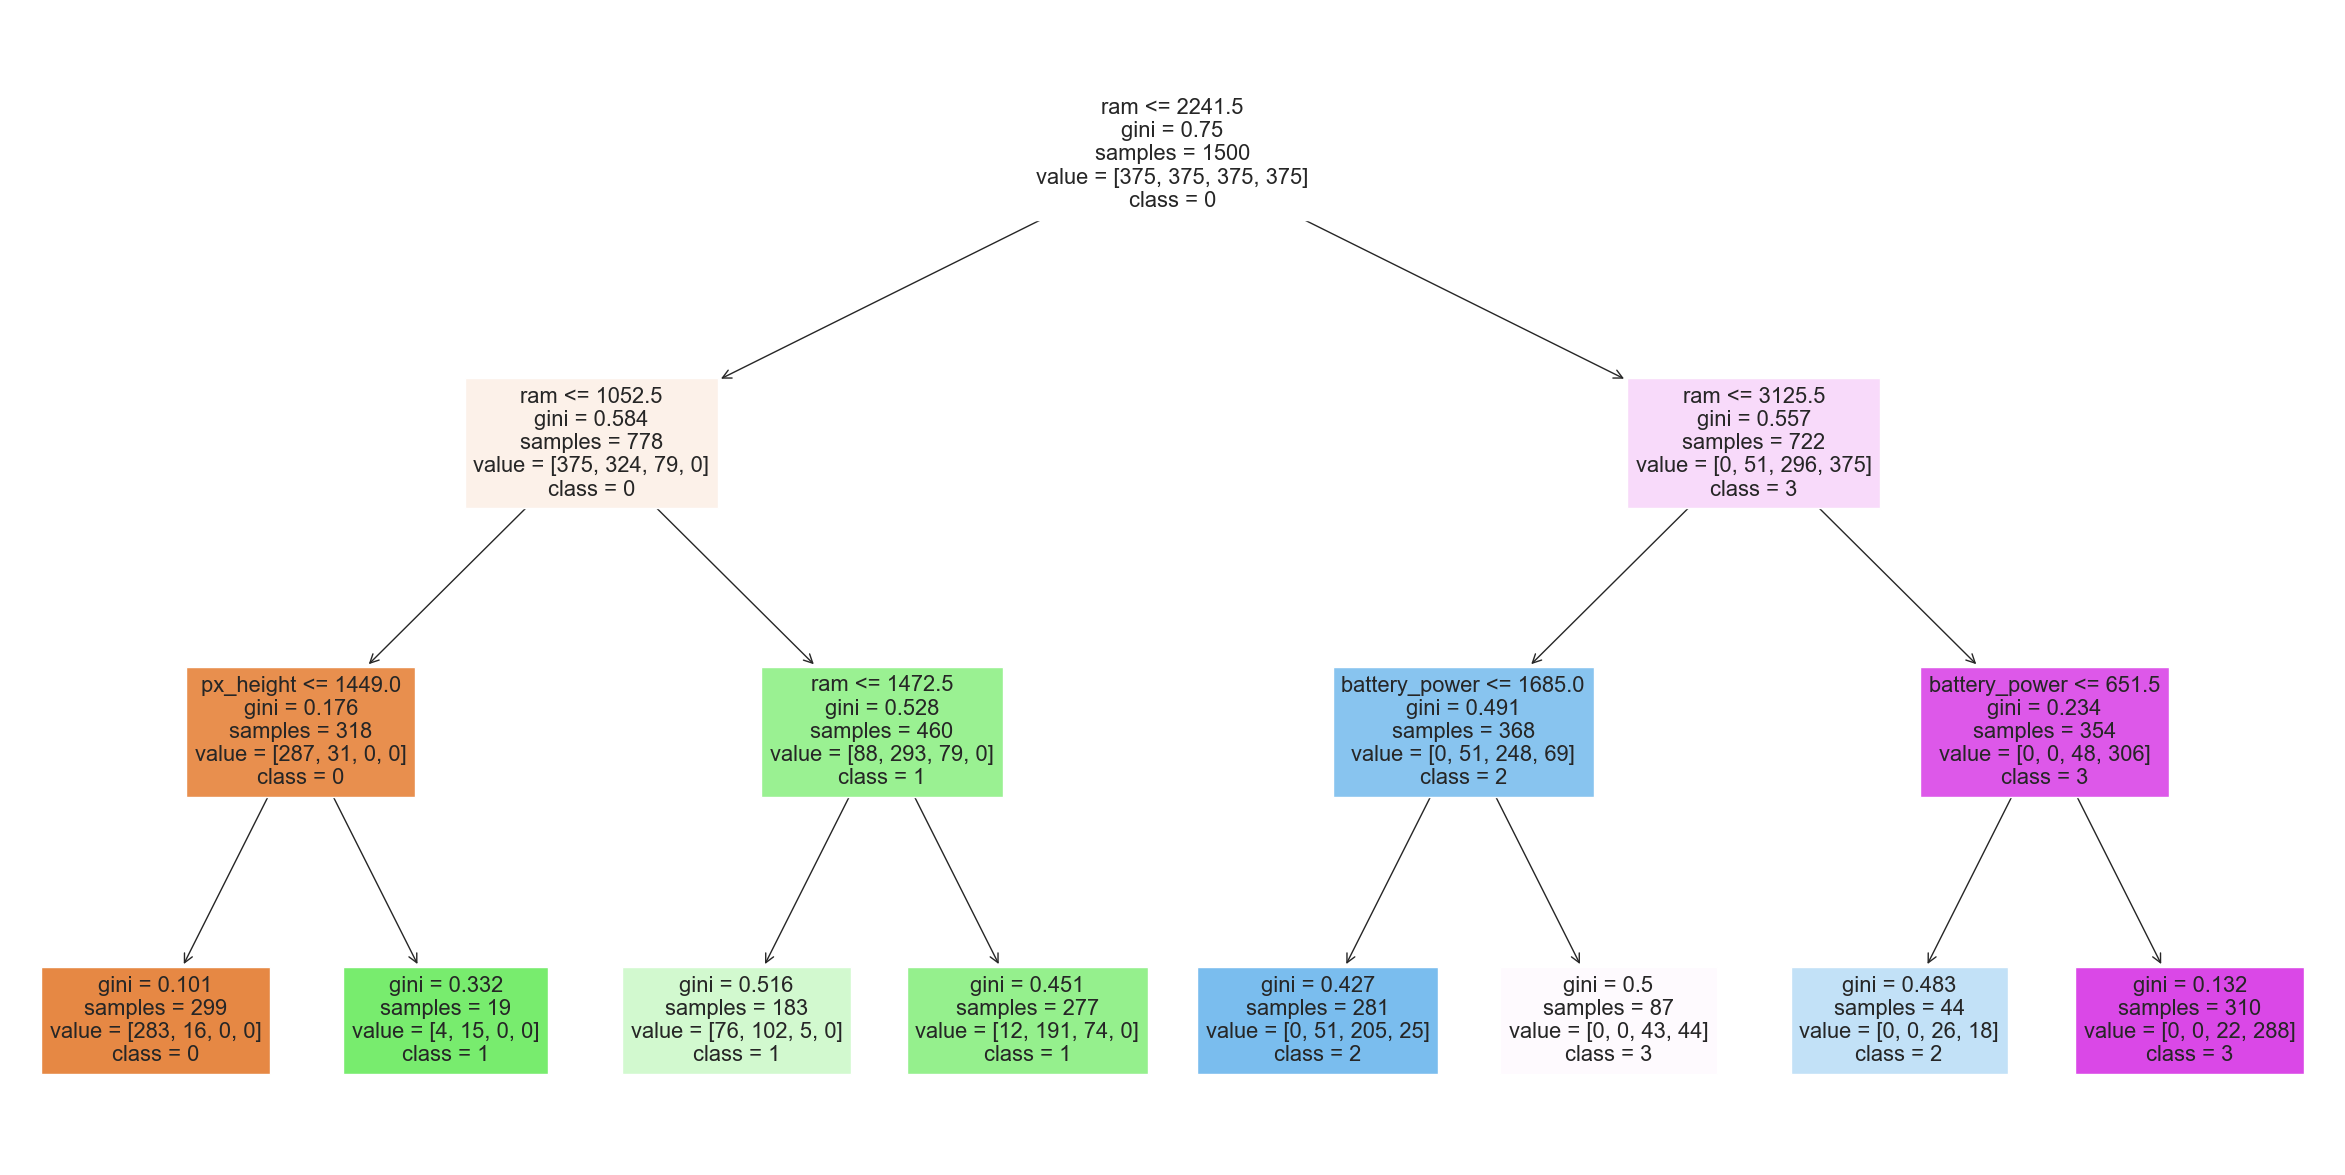

In [109]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_model, feature_names = feature_names, class_names = target_names, filled = True)


#### Tune Decision Tree Hyperparameters Using GridSearchCV

In [111]:
model = DecisionTreeClassifier()

# Define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)

# Define search parameters
max_depth = range(2, 19, 1)
criterion = ['entropy', 'gini']   


param_grid = {'max_depth': max_depth, 'criterion':criterion}

search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=cv)

GridSearchCV = search.fit(X_train1, y_train1)

DT_modelcv = GridSearchCV.best_estimator_

# Summarize result
print('Best Score: %s' % GridSearchCV.best_score_)
print('Best Hyperparameters: %s' % GridSearchCV.best_params_)

Best Score: 0.8495555555555556
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 8}


### Tuned Decision Tree Model Evaluation

#### Train Tuned Model

In [112]:
DT_modelcv.fit(X_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

#### Predict Tuned Model X-test

In [113]:
y_pred = DT_modelcv.predict(X_test1)

#### Check Tuned Model Accuracy Score

In [114]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred)))

Model accuracy score: 0.8560


#### Tuned Model Confusion Matrix

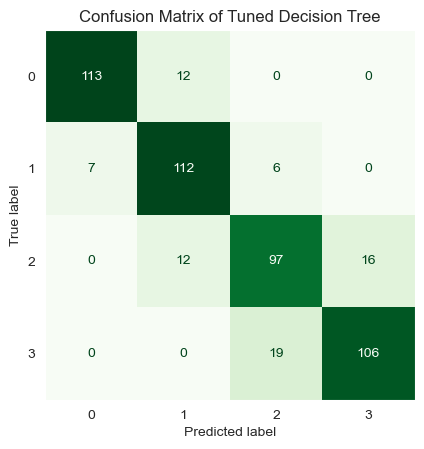

In [115]:
ConfusionMatrixDisplay.from_estimator(DT_modelcv, X_test1, y_test1, colorbar=False, cmap='Greens')
plt.title('Confusion Matrix of Tuned Decision Tree')
plt.grid(False)

#### Model Classification Report

In [116]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       125
           1       0.82      0.90      0.86       125
           2       0.80      0.78      0.79       125
           3       0.87      0.85      0.86       125

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



#### Tuned Model Performance Metrics

In [117]:
TunedDT_result = metrics_calculator(y_test1, y_pred, 'Tuned Decision Tree')
TunedDT_result

Tuned Decision Tree
Accuracy              0.856000
Precision             0.857283
Recall                0.856000
F1-score              0.856103

#### Plot Tree

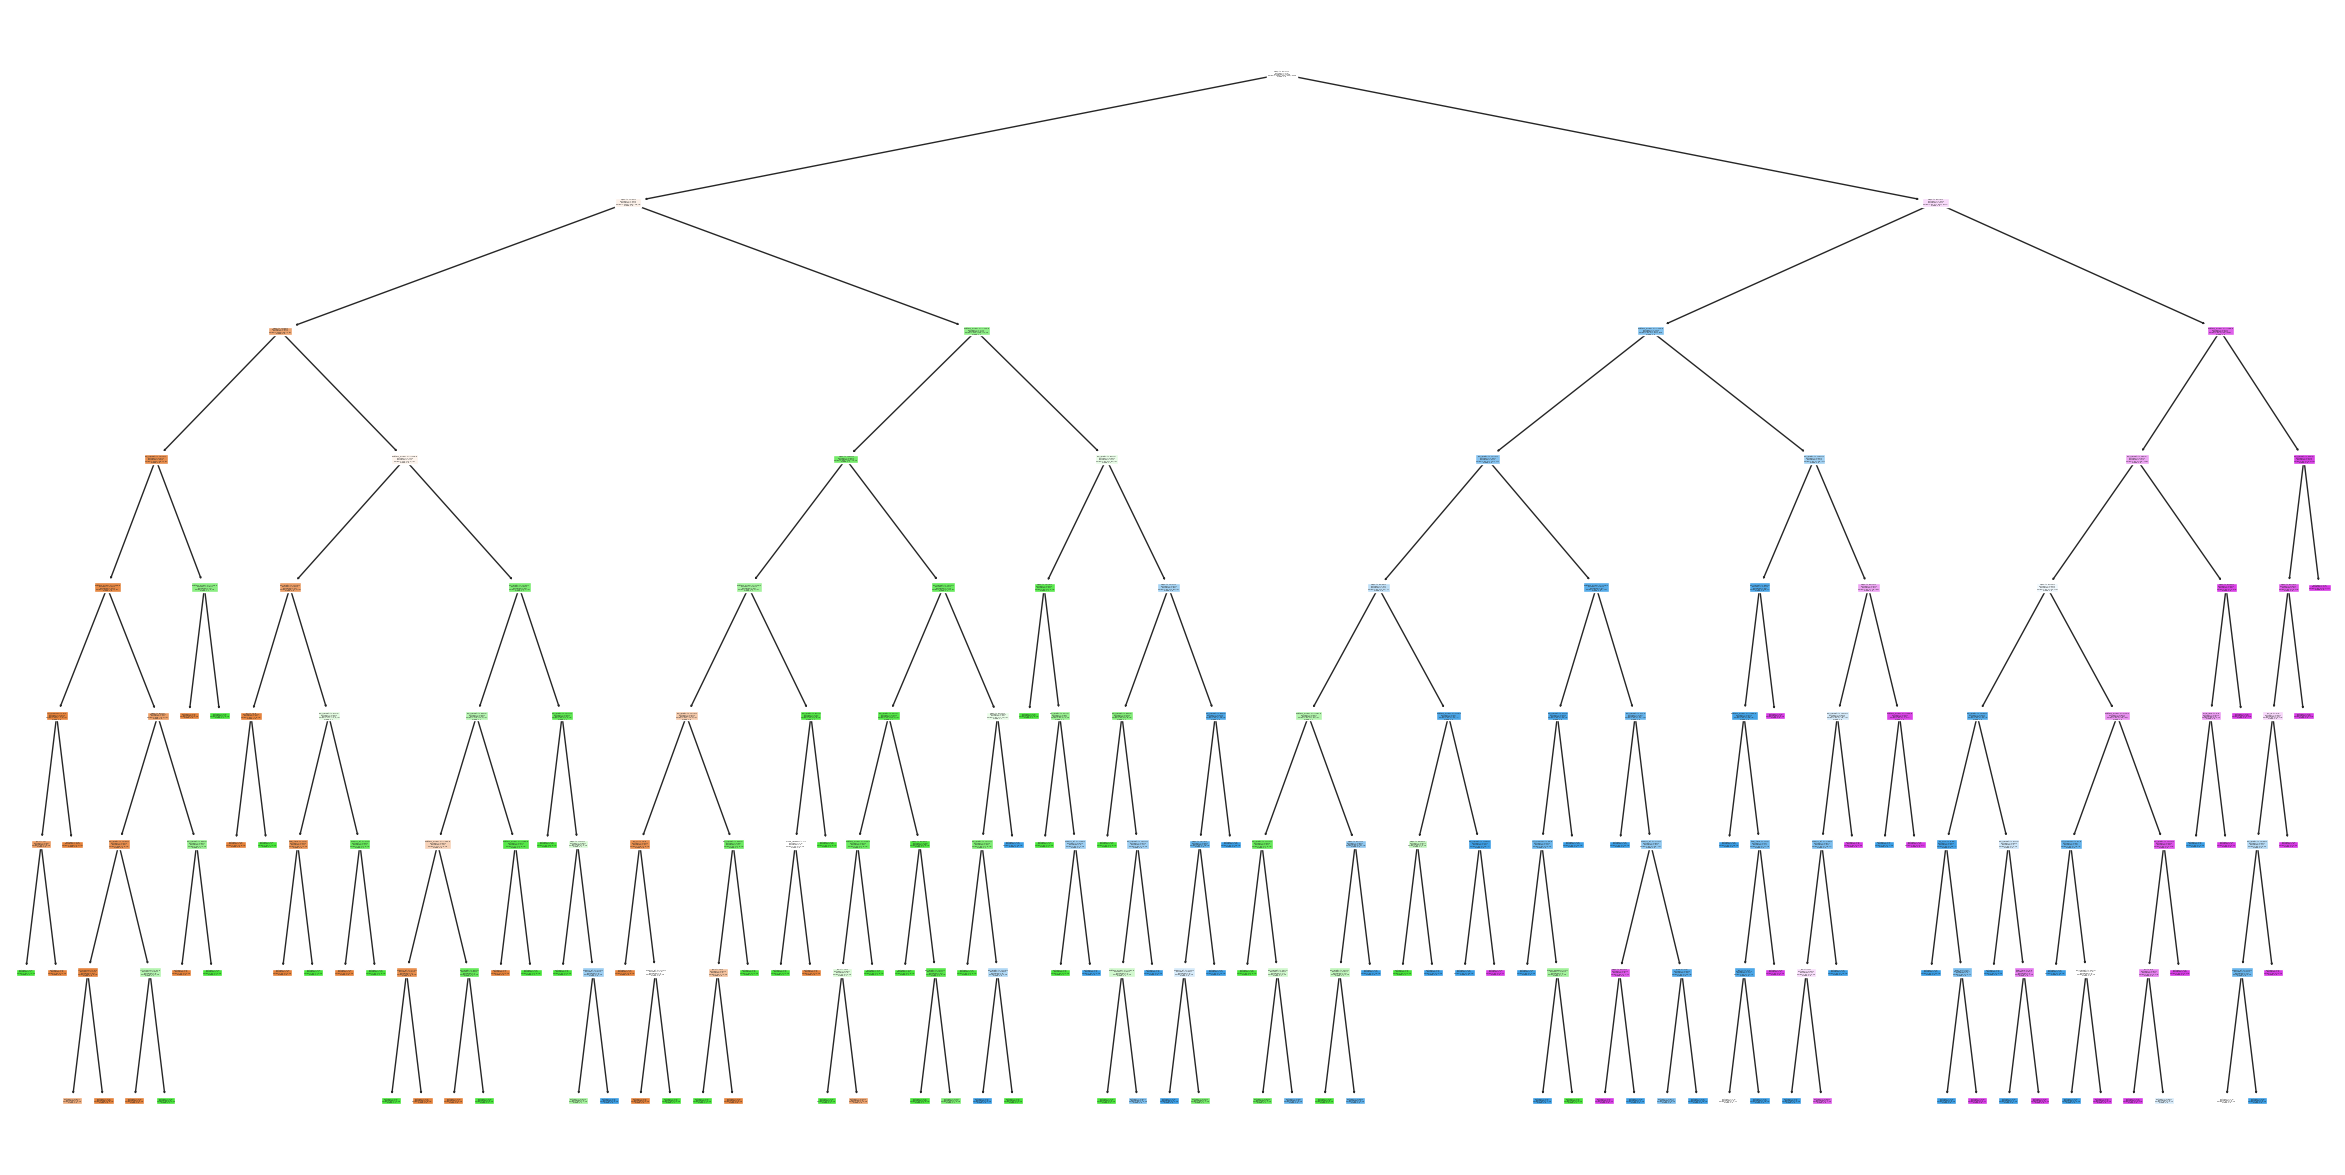

In [119]:
feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT_modelcv, feature_names = feature_names, class_names = target_names, filled = True)